# Assignment 2
Letter Recognition using Deep Learning

In [1]:
# 🧩 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# 📂 Step 2: Load Dataset from Local Path
# Make sure the file 'letter-recognition.data' is in your working directory
column_names = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar',
                'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br',
                'x-ege', 'xegvy', 'y-ege', 'yegvx']

data = pd.read_csv('letter-recognition.data', header=None, names=column_names)
data.head()


,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
# ⚙️ Step 3: Preprocess the Data

# Features and target
X = data.iloc[:, 1:].values  # 16 features
y = data.iloc[:, 0].values   # Target labels (letters)

# Label encoding (A-Z → 0-25)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the labels
y_onehot = to_categorical(y_encoded)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)


In [7]:
# 🧠 Step 4: Build the Deep Neural Network

model = Sequential([
    Dense(128, activation='relu', input_shape=(16,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')  # 26 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,122 (47.35 KB)

 Trainable params: 12,122 (47.35 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 🏋️ Step 5: Train the Model

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)


Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2199 - loss: 2.7602 - val_accuracy: 0.6581 - val_loss: 1.2547
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5554 - loss: 1.4270 - val_accuracy: 0.7394 - val_loss: 0.9458
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6261 - loss: 1.1964 - val_accuracy: 0.7594 - val_loss: 0.8231
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - loss: 1.0450 - val_accuracy: 0.7744 - val_loss: 0.7449
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6924 - loss: 0.9781 - val_accuracy: 0.7950 - val_loss: 0.6814
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7173 - loss: 0.8904 - val_accuracy: 0.8163 - val_loss: 0.6230
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7333 - loss: 0.8411 - val_accuracy: 0.8244 - val_loss: 0.5851
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7491 - loss: 0.7960 - val_accuracy: 0.

In [11]:
# 📊 Step 6: Evaluate the Model

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9181 - loss: 0.2745
Test Accuracy: 92.35%


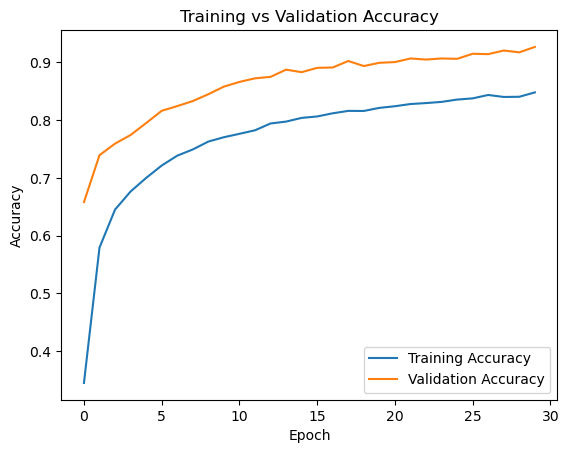

In [13]:
# 📈 Step 7: Visualize Training Performance

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
              precision    recall  f1-score   support

           A       0.95      0.97      0.96       149
           B       0.83      0.94      0.88       153
           C       0.98      0.93      0.95       137
           D       0.89      0.90      0.90       156
           E       0.90      0.94      0.92       141
           F       0.90      0.89      0.90       140
           G       0.90      0.93      0.91       160
           H       0.94      0.73      0.82       144
           I       0.92      0.88      0.90       146
           J       0.96      0.92      0.94       149
           K       0.85      0.85      0.85       130
           L       0.99      0.93      0.96       155
           M       0.96      0.96      0.96       168
           N       0.96      0.92      0.94       151
           O       0.88      0.93      0.90       145
           P       0.98      0.88      0.93       173
           Q       0.97      0.96     

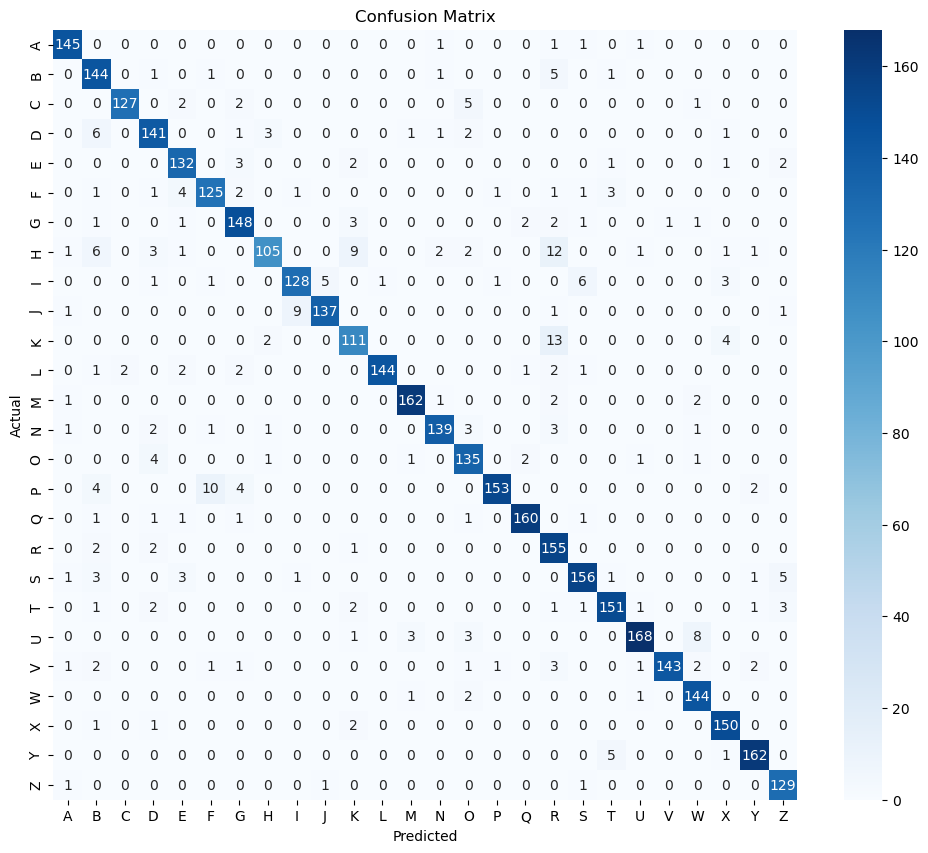

In [15]:
# 🧾 Step 8: Classification Report and Confusion Matrix

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
